In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

## 1. Первичный анализ данных

In [64]:
fraud_df = pd.read_csv('../Data/creditcard.csv')
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [66]:
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Колонки v1 - v28 преобразованны при помощи метода главных компонент для защиты данных пользователей.

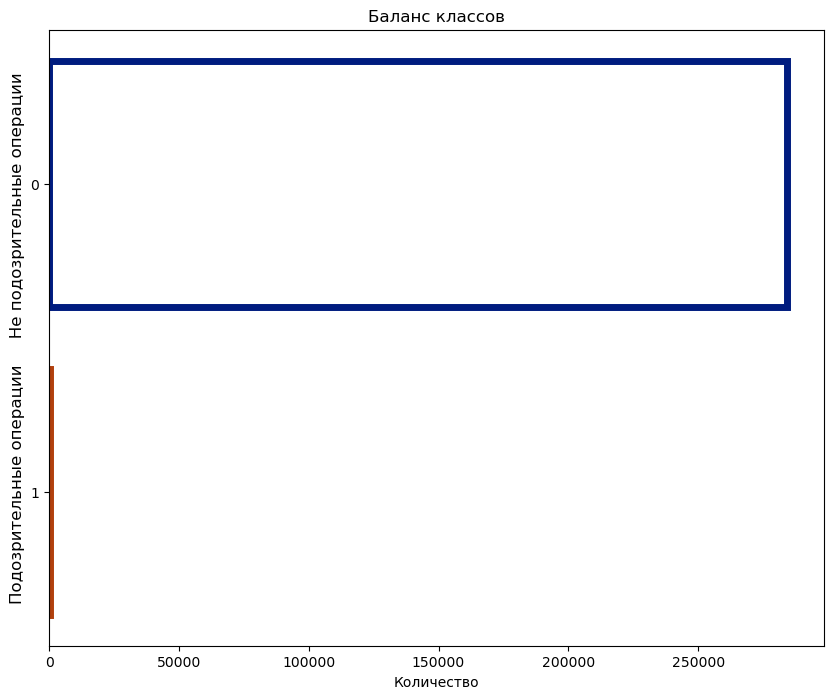

In [67]:
plt.figure(figsize=(10,8))

sns.countplot(
    y="Class", 
    data=fraud_df,
    facecolor=(0, 0, 0, 0),
    linewidth=5, 
    edgecolor=sns.color_palette("dark", 3)
)

plt.title('Баланс классов')
plt.xlabel('Количество')
plt.ylabel('Подозрительные операции     Не подозрительные операции', fontsize=12)
plt.show();

В данных есть дизбаланс классов -> такие метрики, как accuracy нам не подходят.

Преобразуем признак "Класс" в категориальный:

In [68]:
fraud_df['Class']= fraud_df['Class'].astype('category')

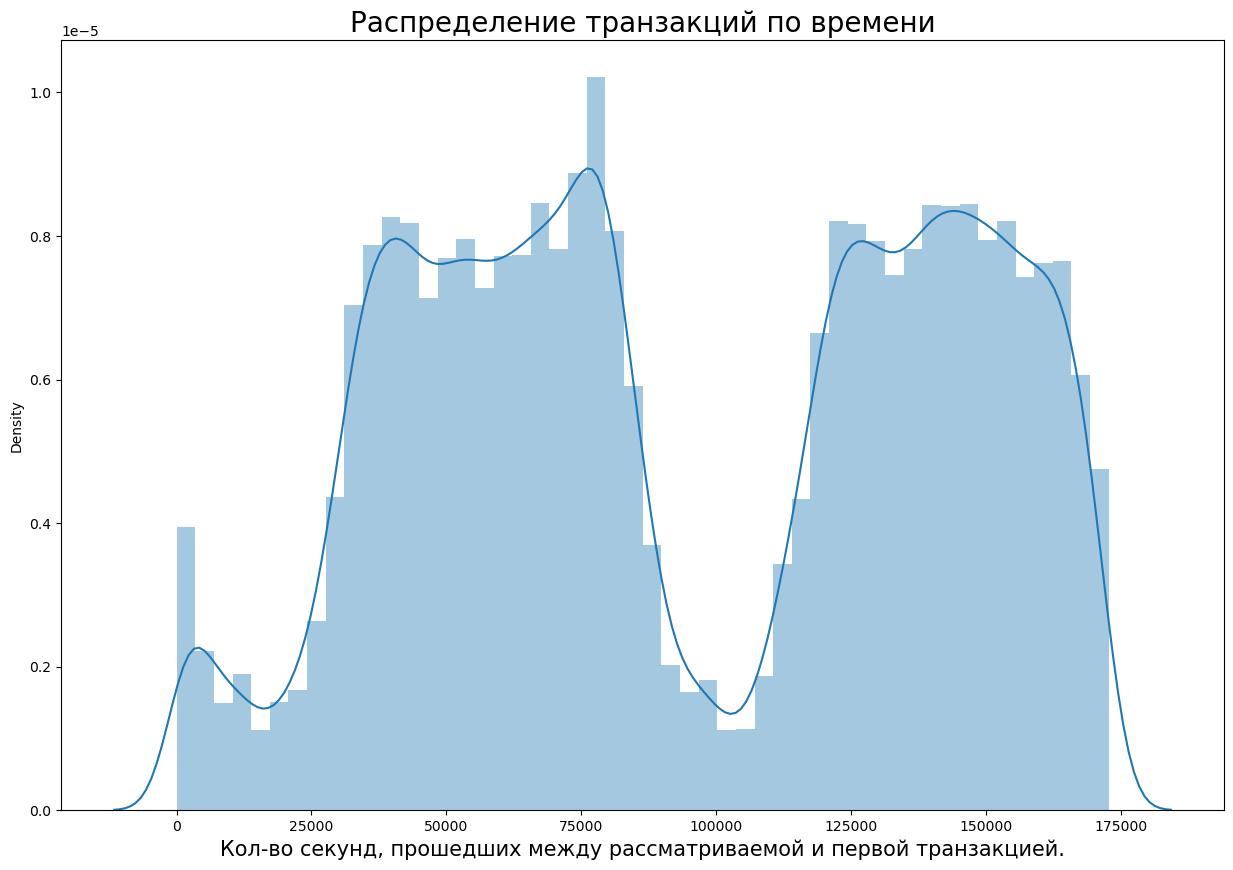

In [69]:
plt.figure(figsize=(15,10))
plt.title('Распределение транзакций по времени', fontsize=20)
sns.distplot(fraud_df['Time'])
plt.xlabel(
    'Кол-во секунд, прошедших между рассматриваемой и первой транзакцией.',
    fontsize=15
)
plt.show();

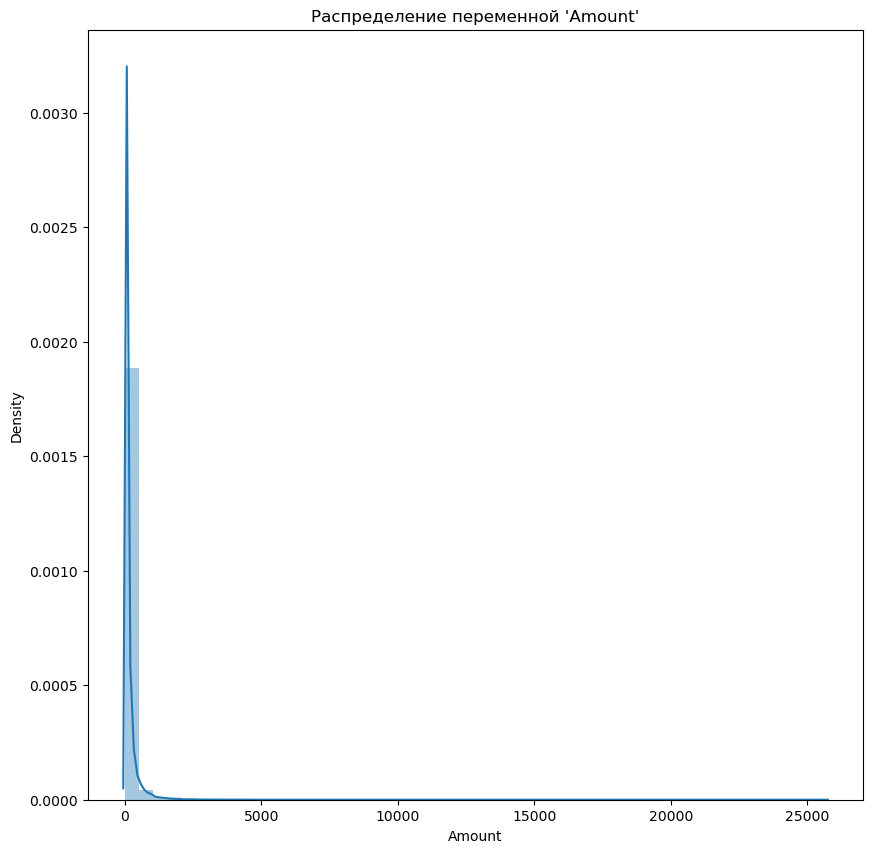

In [70]:
plt.figure(figsize=(10,10))
sns.distplot(fraud_df['Amount'])
plt.title('Распределение переменной \'Amount\'')
plt.show();

Из приведенных выше графиков можно сделать вывод что перемнные: Time, Amount нужно подвергнуть стандартизации, чтобы нормализовать распредление.

Перед стандартизацией я хочу создать функцию «Час», которая поможет лучше использовать «Время» и его связь с остальными столбцами.

In [71]:
fraud_df['Hour'] = fraud_df['Time'].apply(lambda x: np.ceil(float(x) / 3600) % 24)

Посмотрим, в какое время дня мошенники наиболее активны и сравним с активностью нормальных операций.

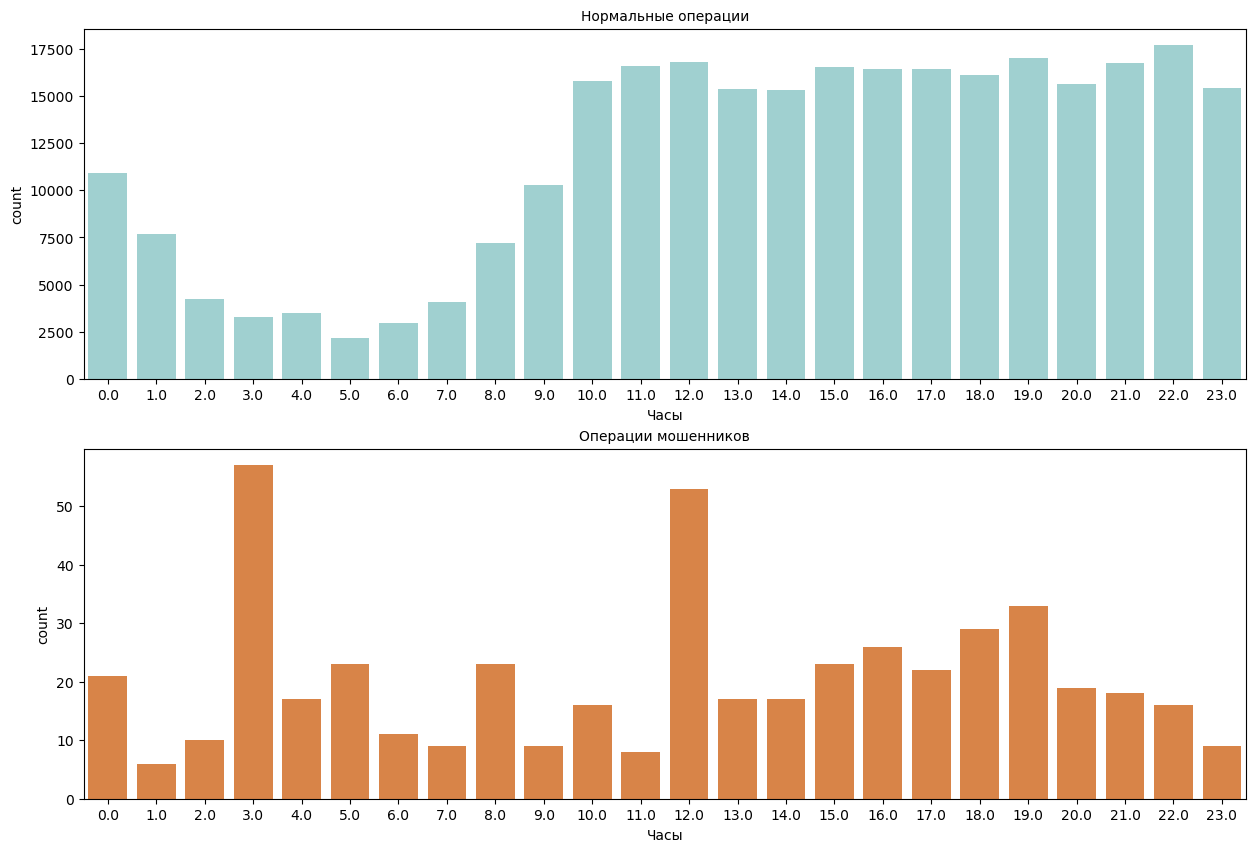

In [72]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(
    x="Hour",
    data=fraud_df[fraud_df['Class'] == 0], 
    color="#98D8D8",  
    ax=axes[0])
axes[0].set_title("Нормальные операции", fontsize=10)
axes[0].set_xlabel('Часы', fontsize=10)


sns.countplot(
    x="Hour",
    data=fraud_df[fraud_df['Class'] == 1],
    color="#F08030", 
    ax=axes[1])
axes[1].set_title("Операции мошенников", fontsize=10)
axes[1].set_xlabel('Часы', fontsize=10)
plt.show();


Приведенные выше графики показывают, что обычные и мошеннические транзакции совершались каждый час. Для мошеннических транзакций третий и двенадцатый часы – самые "горячие".

Вернемся к стандартизации, как мы помним нам нужно превести перемнные: Time, Amount к нормальному виду.

In [73]:
fraud_df[['Time', 'Amount']] = StandardScaler().fit_transform(fraud_df[['Time', 'Amount']])

## 2. Построение моделей

Нужно расбить выборку для обучения и валидации.

In [74]:
X = fraud_df.drop('Class', axis=1)
y = fraud_df['Class']

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3,random_state=42
)

Будем пробовать различные алгоритмы машинного обучения далее мы сможем их сравнить

#### Cлучайный лес

In [78]:
model_random_forest = RandomForestClassifier(
    n_estimators=500, 
    criterion = 'gini', 
    max_depth = 4, 
    class_weight='balanced', 
    random_state=42
).fit(X_train, y_train)

predict_random_forest = model_random_forest.predict(X_test)

#### Метод опорных векторов

In [80]:
model_SVM = svm.SVC(
    kernel='rbf', 
    class_weight='balanced', 
    gamma='scale', 
    probability=True, 
    random_state=42
).fit(X_train, y_train)

predict_SVM = model_SVM.predict(X_test)

#### Модель логистической регрессии

In [81]:
model_log_reg = LogisticRegression(
    solver='lbfgs', 
    multi_class='multinomial',
    class_weight='balanced', 
    max_iter=500, 
    random_state=42
).fit(X_train, y_train)

predict_log_reg = model_log_reg.predict(X_test)

#### Многослойный перцептрон

In [82]:
model_MLP = MLPClassifier(
    solver='lbfgs', 
    activation='logistic', 
    hidden_layer_sizes=(100,),
    learning_rate='constant', 
    max_iter=1500, 
    random_state=42
).fit(X_train, y_train)

predict_MLP = model_MLP.predict(X_test)

Посмотрим classification report для всех алгоритмов

In [85]:
print("Classification_RF:")
print(classification_report(y_test, predict_random_forest))
print("Classification_SVM:")
print(classification_report(y_test, predict_SVM))
print("Classification_LR:")
print(classification_report(y_test, predict_log_reg))
print("Classification_MLP:")
print(classification_report(y_test, predict_MLP))

Classification_RF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.26      0.90      0.41       136

    accuracy                           1.00     85443
   macro avg       0.63      0.95      0.70     85443
weighted avg       1.00      1.00      1.00     85443

Classification_SVM:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.09      0.87      0.17       136

    accuracy                           0.99     85443
   macro avg       0.55      0.93      0.58     85443
weighted avg       1.00      0.99      0.99     85443

Classification_LR:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg    

Так же построим график roc auc кривых

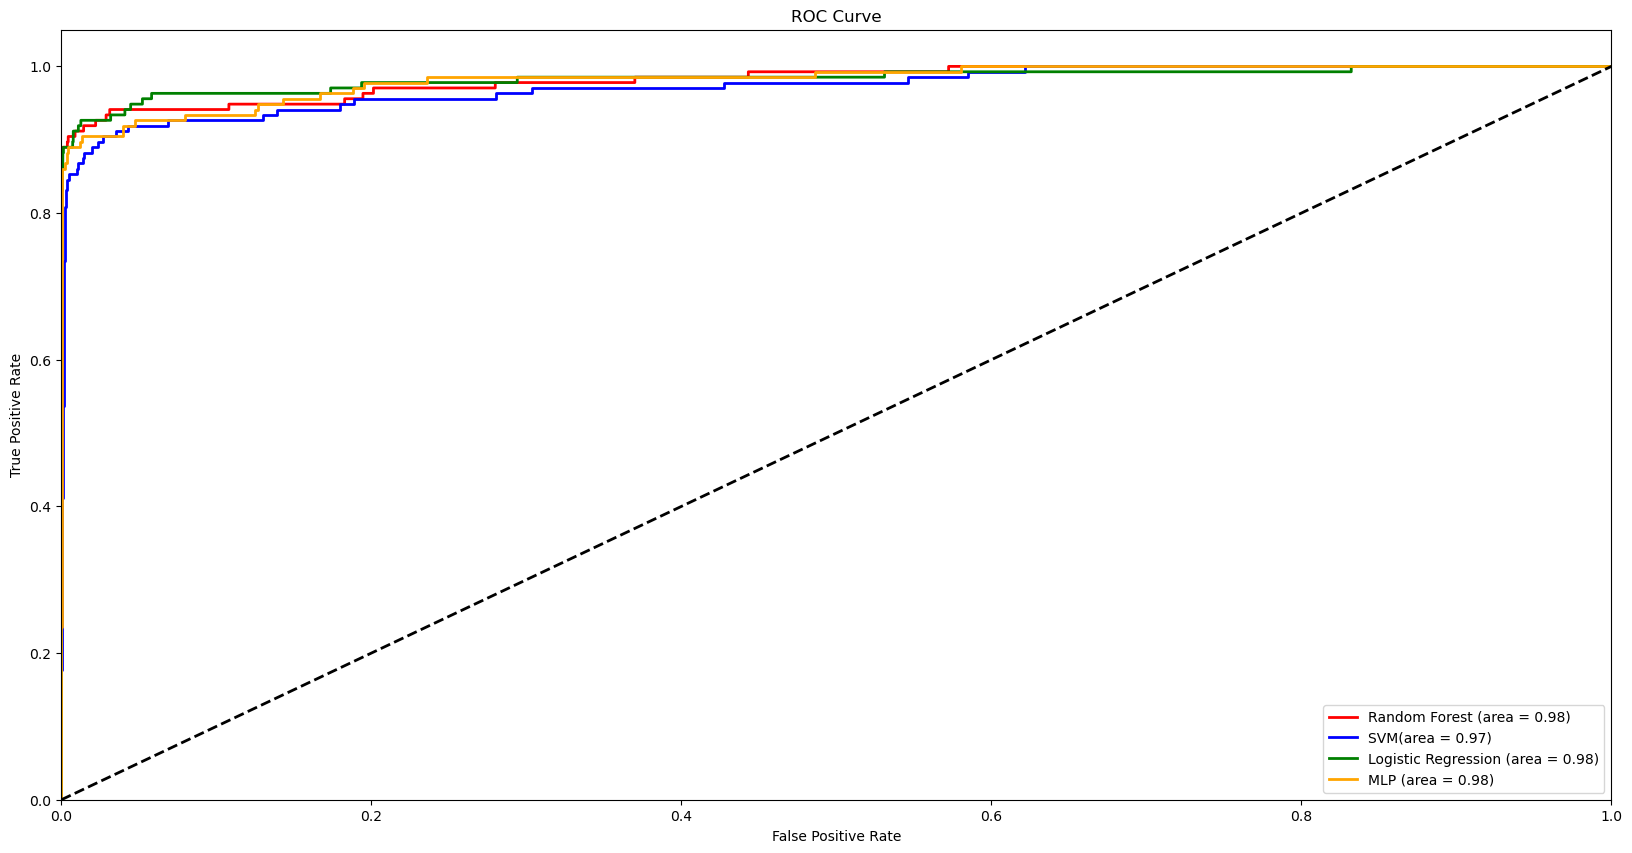

In [92]:
rf_predict_probabilities = model_random_forest.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predict_probabilities)
rf_roc_auc = auc(rf_fpr, rf_tpr)

svm_predict_probabilities = model_SVM.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predict_probabilities)
svm_roc_auc = auc(svm_fpr, svm_tpr)

lr_predict_probabilities = model_log_reg.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predict_probabilities)
lr_roc_auc = auc(lr_fpr, lr_tpr)

mlp_predict_probabilities = model_MLP.predict_proba(X_test)[:,1]
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_predict_probabilities)
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)

plt.figure()
plt.plot(rf_fpr, rf_tpr, color='red',lw=2,
         label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.plot(svm_fpr, svm_tpr, color='blue',lw=2, 
         label='SVM(area = %0.2f)' % svm_roc_auc)

plt.plot(lr_fpr, lr_tpr, color='green',lw=2, 
         label='Logistic Regression (area = %0.2f)' % lr_roc_auc)

plt.plot(mlp_fpr, mlp_tpr, color='orange',lw=2, 
         label='MLP (area = %0.2f)' % mlp_roc_auc)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

В итоге наши алгоритмы показали практически одинаковую точность по метрикам.